### IMDB 5000 Movie Dataset
https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

In [18]:
import pandas as pd
import numpy as np

In [19]:
data = pd.read_csv('/home/nadiera/Recommender_System/Data/archive (1)/movie_metadata.csv')
data .head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [20]:
data.shape

(5043, 28)

In [21]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

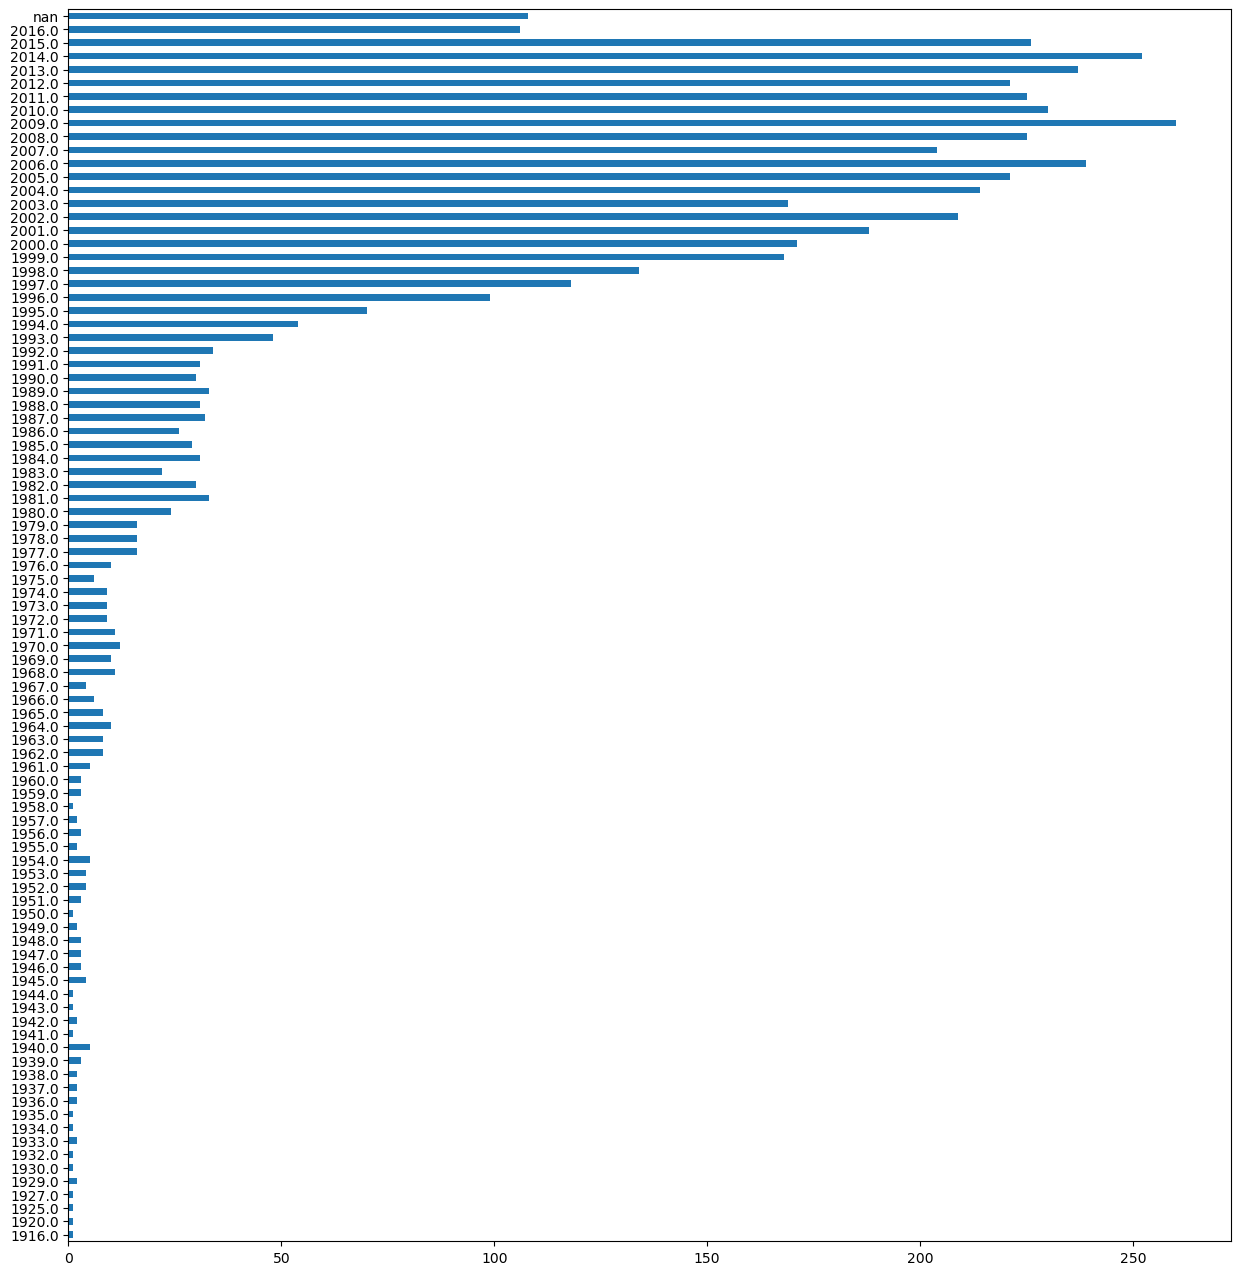

In [22]:
# we have movies only upto 2016
import matplotlib.pyplot as plt
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [23]:
# recommendation will be based on these features only
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [24]:
data.head()

director_name     actor_1_name      actor_2_name          actor_3_name  \
0      James Cameron      CCH Pounder  Joel David Moore             Wes Studi   
1     Gore Verbinski      Johnny Depp     Orlando Bloom        Jack Davenport   
2         Sam Mendes  Christoph Waltz      Rory Kinnear      Stephanie Sigman   
3  Christopher Nolan        Tom Hardy    Christian Bale  Joseph Gordon-Levitt   
4        Doug Walker      Doug Walker        Rob Walker                   NaN   

                            genres  \
0  Action|Adventure|Fantasy|Sci-Fi   
1         Action|Adventure|Fantasy   
2        Action|Adventure|Thriller   
3                  Action|Thriller   
4                      Documentary   

                                         movie_title  
0                                            Avatar   
1          Pirates of the Caribbean: At World's End   
2                                           Spectre   
3                             The Dark Knight Rises   
4  Star Wars: Episode VII - The Force Awakens    ...

In [25]:
data.isna().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
movie_title        0
dtype: int64

In [26]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [27]:
data.head()

director_name     actor_1_name      actor_2_name          actor_3_name  \
0      James Cameron      CCH Pounder  Joel David Moore             Wes Studi   
1     Gore Verbinski      Johnny Depp     Orlando Bloom        Jack Davenport   
2         Sam Mendes  Christoph Waltz      Rory Kinnear      Stephanie Sigman   
3  Christopher Nolan        Tom Hardy    Christian Bale  Joseph Gordon-Levitt   
4        Doug Walker      Doug Walker        Rob Walker               unknown   

                            genres  \
0  Action|Adventure|Fantasy|Sci-Fi   
1         Action|Adventure|Fantasy   
2        Action|Adventure|Thriller   
3                  Action|Thriller   
4                      Documentary   

                                         movie_title  
0                                            Avatar   
1          Pirates of the Caribbean: At World's End   
2                                           Spectre   
3                             The Dark Knight Rises   
4  Star Wars: Episode VII - The Force Awakens    ...

In [28]:
data['genres'] = data['genres'].str.replace('|', ' ')

/tmp/ipykernel_184091/3923011829.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['genres'] = data['genres'].str.replace('|', ' ')


In [29]:
data

director_name     actor_1_name      actor_2_name  \
0         James Cameron      CCH Pounder  Joel David Moore   
1        Gore Verbinski      Johnny Depp     Orlando Bloom   
2            Sam Mendes  Christoph Waltz      Rory Kinnear   
3     Christopher Nolan        Tom Hardy    Christian Bale   
4           Doug Walker      Doug Walker        Rob Walker   
...                 ...              ...               ...   
5038        Scott Smith      Eric Mabius     Daphne Zuniga   
5039            unknown      Natalie Zea     Valorie Curry   
5040   Benjamin Roberds      Eva Boehnke     Maxwell Moody   
5041        Daniel Hsia        Alan Ruck     Daniel Henney   
5042           Jon Gunn      John August  Brian Herzlinger   

              actor_3_name                           genres  \
0                Wes Studi  Action Adventure Fantasy Sci-Fi   
1           Jack Davenport         Action Adventure Fantasy   
2         Stephanie Sigman        Action Adventure Thriller   
3     Joseph Gordon-Levitt                  Action Thriller   
4                  unknown                      Documentary   
...                    ...                              ...   
5038          Crystal Lowe                     Comedy Drama   
5039         Sam Underwood     Crime Drama Mystery Thriller   
5040        David Chandler            Drama Horror Thriller   
5041           Eliza Coupe             Comedy Drama Romance   
5042              Jon Gunn                      Documentary   

                                            movie_title  
0                                               Avatar   
1             Pirates of the Caribbean: At World's End   
2                                              Spectre   
3                                The Dark Knight Rises   
4     Star Wars: Episode VII - The Force Awakens    ...  
...                                                 ...  
5038                           Signed Sealed Delivered   
5039                         The Following               
5040                              A Plague So Pleasant   
5041                                  Shanghai Calling   
5042                                 My Date with Drew   

[5043 rows x 6 columns]

In [30]:
data['movie_title'] = data['movie_title'].str.lower()

In [31]:
data

director_name     actor_1_name      actor_2_name  \
0         James Cameron      CCH Pounder  Joel David Moore   
1        Gore Verbinski      Johnny Depp     Orlando Bloom   
2            Sam Mendes  Christoph Waltz      Rory Kinnear   
3     Christopher Nolan        Tom Hardy    Christian Bale   
4           Doug Walker      Doug Walker        Rob Walker   
...                 ...              ...               ...   
5038        Scott Smith      Eric Mabius     Daphne Zuniga   
5039            unknown      Natalie Zea     Valorie Curry   
5040   Benjamin Roberds      Eva Boehnke     Maxwell Moody   
5041        Daniel Hsia        Alan Ruck     Daniel Henney   
5042           Jon Gunn      John August  Brian Herzlinger   

              actor_3_name                           genres  \
0                Wes Studi  Action Adventure Fantasy Sci-Fi   
1           Jack Davenport         Action Adventure Fantasy   
2         Stephanie Sigman        Action Adventure Thriller   
3     Joseph Gordon-Levitt                  Action Thriller   
4                  unknown                      Documentary   
...                    ...                              ...   
5038          Crystal Lowe                     Comedy Drama   
5039         Sam Underwood     Crime Drama Mystery Thriller   
5040        David Chandler            Drama Horror Thriller   
5041           Eliza Coupe             Comedy Drama Romance   
5042              Jon Gunn                      Documentary   

                                            movie_title  
0                                               avatar   
1             pirates of the caribbean: at world's end   
2                                              spectre   
3                                the dark knight rises   
4     star wars: episode vii - the force awakens    ...  
...                                                 ...  
5038                           signed sealed delivered   
5039                         the following               
5040                              a plague so pleasant   
5041                                  shanghai calling   
5042                                 my date with drew   

[5043 rows x 6 columns]

In [32]:
# null terminating char at the end
data['movie_title'][21]

'the amazing spider-man\xa0'

In [33]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [34]:
#let's check again
data['movie_title'][21]

'the amazing spider-man'

In [35]:
#let's save the processed dataset
data.to_csv('data1.csv',index=False)

### The Movies Dataset
https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

In [36]:
credits = pd.read_csv('/home/nadiera/Recommender_System/Data/archive (2)/credits.csv')
credits.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [39]:
meta = pd.read_csv('/home/nadiera/Recommender_System/Data/archive (2)/movies_metadata.csv')

/tmp/ipykernel_184091/3935911664.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('/home/nadiera/Recommender_System/Data/archive (2)/movies_metadata.csv')


In [41]:
meta 

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2      A family wedding reignites the ancient feud be...  ...   1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4      Just when George Banks has recovered from his ...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisati

In [42]:
#coerce:replace error as Nan

In [43]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce') #If ‘coerce’, then invalid parsing will be set as NaN, if ‘raise’, then invalid parsing will raise an exception, If ‘ignore’, then invalid parsing will return the input

In [44]:
#format the date
meta['year'] = meta['release_date'].dt.year

In [45]:
meta['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [46]:
# Getting only 2017 movies as we already have movies up to the year 2016 in data 1 processed file. 
# We don't have enough data for the movies from 2018, 2019 and 2020. 
# We'll deal with it in the upcoming preprocessing files
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [47]:
new_meta

genres      id  \
26560  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...  166426   
26561  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  141052   
26565  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  284053   
26566  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  283995   
30536  [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...  245842   
...                                                  ...     ...   
45398  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  468707   
45417  [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...  461297   
45437  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...  455661   
45453  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...  404604   
45465                                                 []  461257   

                                                  title    year  
26560  Pirates of the Caribbean: Dead Men Tell No Tales  2017.0  
26561                                    Justice League  2017.0  
26565                                    Thor: Ragnarok  2017.0  
26566                    Guardians of the Galaxy Vol. 2  2017.0  
30536                               The King's Daughter  2017.0  
...                                                 ...     ...  
45398                  Thick Lashes of Lauri Mäntyvaara  2017.0  
45417                       Cop and a Half: New Recruit  2017.0  
45437                                    In a Heartbeat  2017.0  
45453                                               Mom  2017.0  
45465                                          Queerama  2017.0  

[532 rows x 4 columns]

In [48]:
new_meta.dtypes

genres     object
id         object
title      object
year      float64
dtype: object

In [49]:
#converting the "id" to integer
new_meta['id'] = new_meta['id'].astype(int)

In [50]:
#add the new_meta data to the credit data. They all have "id" so we can merge on that.
data = pd.merge(new_meta, credits, on='id')

In [51]:
pd.set_option('display.max_colwidth', 75)
data

genres  \
0    [{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...   
1    [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...   
2    [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...   
3    [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...   
4    [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...   
..                                                                          ...   
526            [{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]   
527  [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...   
528  [{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...   
529  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...   
530                                                                          []   

         id                                             title    year  \
0    166426  Pirates of the Caribbean: Dead Men Tell No Tales  2017.0   
1    141052                                    Justice League  2017.0   
2    284053                                    Thor: Ragnarok  2017.0   
3    283995                    Guardians of the Galaxy Vol. 2  2017.0   
4    245842                               The King's Daughter  2017.0   
..      ...                                               ...     ...   
526  468707                  Thick Lashes of Lauri Mäntyvaara  2017.0   
527  461297                       Cop and a Half: New Recruit  2017.0   
528  455661                                    In a Heartbeat  2017.0   
529  404604                                               Mom  2017.0   
530  461257                                          Queerama  2017.0   

                                                                           cast  \
0    [{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...   
1    [{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...   
2    [{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...   
3    [{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...   
4    [{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...   
..                                                                          ...   
526  [{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...   
527  [{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...   
528                                                                          []   
529  [{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...   
530                                                                          []   

                                                                           crew  
0    [{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ...  
1    [{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ...  
2    [{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge...  
3    [{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend...  
4    [{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '...  
..                                                                          ...  
526  [{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '...  
527  [{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge...  
528  [{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend...  
529  [{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend...  
530  [{'credit_id': '593e676c92514105b702e68e', 'department': 'Directing', '...  

[531 rows x 6 columns]

In [52]:
# we will convert the "genre", "cast" and "crew" column into a list. if we observe it carefully, we will realised that it's a list containing dictionary. 
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))  #the "literal_eval" helps to convert the string into a list
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

### Genres


In [53]:
#Now we will have to take out the individual genres like adventure, action, sci-fi, etc. using the following function


def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction': #am only renaming the "Science Fiction" to "Sci-Fi" to make it the name shorter. Apart from that all other names remain the same.
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen)) #then we will join them together and return the valuse

In [54]:
#now let's apply the function on the genre column

data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [55]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

### Actor 1

In [56]:
#let's do the same for cast

def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [57]:

#let's apply it on the cast column for the first actor

data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

### Actor 2

In [58]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [59]:

#let's apply it on the cast column for the second actor
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [60]:
data['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

### Actor 3

In [61]:

def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [62]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [63]:
data['actor_3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

### Directors


In [64]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [65]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [66]:
data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [67]:
#selecting only the prepared data
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]
movie

director_name          actor_1_name    actor_2_name  \
0    Joachim Rønning Espen Sandberg           Johnny Depp   Javier Bardem   
1                       Zack Snyder           Ben Affleck    Henry Cavill   
2                     Taika Waititi       Chris Hemsworth  Tom Hiddleston   
3                        James Gunn           Chris Pratt     Zoe Saldana   
4                     Sean McNamara        Pierce Brosnan    William Hurt   
..                              ...                   ...             ...   
526                Hannaleena Hauru        Inka Haapamäki   Rosa Honkonen   
527           Jonathan A. Rosenbaum  Lou Diamond Phillips   Wallace Shawn   
528        Beth David Esteban Bravo                   NaN             NaN   
529                    Ravi Udyawar        Sridevi Kapoor       Sajal Ali   
530                   Daisy Asquith                   NaN             NaN   

        actor_3_name                      genres_list  \
0      Geoffrey Rush  Adventure Action Fantasy Comedy   
1          Gal Gadot  Action Adventure Fantasy Sci-Fi   
2     Cate Blanchett  Action Adventure Fantasy Sci-Fi   
3      Dave Bautista   Action Adventure Comedy Sci-Fi   
4    Benjamin Walker         Fantasy Action Adventure   
..               ...                              ...   
526   Tiitus Rantala                   Romance Comedy   
527      Gina Holden       Crime Comedy Action Family   
528              NaN  Family Animation Romance Comedy   
529   Akshaye Khanna             Crime Drama Thriller   
530              NaN                              NaN   

                                                title  
0    Pirates of the Caribbean: Dead Men Tell No Tales  
1                                      Justice League  
2                                      Thor: Ragnarok  
3                      Guardians of the Galaxy Vol. 2  
4                                 The King's Daughter  
..                                                ...  
526                  Thick Lashes of Lauri Mäntyvaara  
527                       Cop and a Half: New Recruit  
528                                    In a Heartbeat  
529                                               Mom  
530                                          Queerama  

[531 rows x 6 columns]

In [68]:
movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [69]:
#drop missing values
movie = movie.dropna(how='any')

In [70]:
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [71]:
#renaming
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [72]:
#convert all movie titles to lower case
movie['movie_title'] = movie['movie_title'].str.lower()

In [73]:
#we will be using this information later on in the tfidvectorizor
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']
movie

director_name          actor_1_name  \
0    Joachim Rønning Espen Sandberg           Johnny Depp   
1                       Zack Snyder           Ben Affleck   
2                     Taika Waititi       Chris Hemsworth   
3                        James Gunn           Chris Pratt   
4                     Sean McNamara        Pierce Brosnan   
..                              ...                   ...   
524                     Jim Strouse      Jessica Williams   
525                     Farhad Mann         Adelaide Kane   
526                Hannaleena Hauru        Inka Haapamäki   
527           Jonathan A. Rosenbaum  Lou Diamond Phillips   
529                    Ravi Udyawar        Sridevi Kapoor   

               actor_2_name       actor_3_name  \
0             Javier Bardem      Geoffrey Rush   
1              Henry Cavill          Gal Gadot   
2            Tom Hiddleston     Cate Blanchett   
3               Zoe Saldana      Dave Bautista   
4              William Hurt    Benjamin Walker   
..                      ...                ...   
524            Chris O'Dowd    Keith Stanfield   
525  Benjamin Hollingsworth  Jean Louisa Kelly   
526           Rosa Honkonen     Tiitus Rantala   
527           Wallace Shawn        Gina Holden   
529               Sajal Ali     Akshaye Khanna   

                              genres  \
0    Adventure Action Fantasy Comedy   
1    Action Adventure Fantasy Sci-Fi   
2    Action Adventure Fantasy Sci-Fi   
3     Action Adventure Comedy Sci-Fi   
4           Fantasy Action Adventure   
..                               ...   
524                   Romance Comedy   
525                          Romance   
526                   Romance Comedy   
527       Crime Comedy Action Family   
529             Crime Drama Thriller   

                                          movie_title  \
0    pirates of the caribbean: dead men tell no tales   
1                                      justice league   
2                                      thor: ragnarok   
3                      guardians of the galaxy vol. 2   
4                                 the king's daughter   
..                                                ...   
524                      the incredible jessica james   
525                                 can't buy my love   
526                  thick lashes of lauri mäntyvaara   
527                       cop and a half: new recruit   
529                                               mom   

                                                                           comb  
0    Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...  
1    Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...  
2    Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...  
3    Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...  
4    Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...  
..                                                                          ...  
524    Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy  
525  Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance  
526  Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...  
527  Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...  
529   Sridevi Kapoor Sajal Ali Akshaye Khanna Ravi Udyawar Crime Drama Thriller  

[458 rows x 7 columns]

In [74]:
old = pd.read_csv('data1.csv')
old

director_name     actor_1_name      actor_2_name  \
0         James Cameron      CCH Pounder  Joel David Moore   
1        Gore Verbinski      Johnny Depp     Orlando Bloom   
2            Sam Mendes  Christoph Waltz      Rory Kinnear   
3     Christopher Nolan        Tom Hardy    Christian Bale   
4           Doug Walker      Doug Walker        Rob Walker   
...                 ...              ...               ...   
5038        Scott Smith      Eric Mabius     Daphne Zuniga   
5039            unknown      Natalie Zea     Valorie Curry   
5040   Benjamin Roberds      Eva Boehnke     Maxwell Moody   
5041        Daniel Hsia        Alan Ruck     Daniel Henney   
5042           Jon Gunn      John August  Brian Herzlinger   

              actor_3_name                           genres  \
0                Wes Studi  Action Adventure Fantasy Sci-Fi   
1           Jack Davenport         Action Adventure Fantasy   
2         Stephanie Sigman        Action Adventure Thriller   
3     Joseph Gordon-Levitt                  Action Thriller   
4                  unknown                      Documentary   
...                    ...                              ...   
5038          Crystal Lowe                     Comedy Drama   
5039         Sam Underwood     Crime Drama Mystery Thriller   
5040        David Chandler            Drama Horror Thriller   
5041           Eliza Coupe             Comedy Drama Romance   
5042              Jon Gunn                      Documentary   

                                                 movie_title  
0                                                     avatar  
1                   pirates of the caribbean: at world's end  
2                                                    spectre  
3                                      the dark knight rises  
4     star wars: episode vii - the force awakens              
...                                                      ...  
5038                                 signed sealed delivered  
5039                               the following              
5040                                    a plague so pleasant  
5041                                        shanghai calling  
5042                                       my date with drew  

[5043 rows x 6 columns]

In [75]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

old

director_name     actor_1_name      actor_2_name  \
0         James Cameron      CCH Pounder  Joel David Moore   
1        Gore Verbinski      Johnny Depp     Orlando Bloom   
2            Sam Mendes  Christoph Waltz      Rory Kinnear   
3     Christopher Nolan        Tom Hardy    Christian Bale   
4           Doug Walker      Doug Walker        Rob Walker   
...                 ...              ...               ...   
5038        Scott Smith      Eric Mabius     Daphne Zuniga   
5039            unknown      Natalie Zea     Valorie Curry   
5040   Benjamin Roberds      Eva Boehnke     Maxwell Moody   
5041        Daniel Hsia        Alan Ruck     Daniel Henney   
5042           Jon Gunn      John August  Brian Herzlinger   

              actor_3_name                           genres  \
0                Wes Studi  Action Adventure Fantasy Sci-Fi   
1           Jack Davenport         Action Adventure Fantasy   
2         Stephanie Sigman        Action Adventure Thriller   
3     Joseph Gordon-Levitt                  Action Thriller   
4                  unknown                      Documentary   
...                    ...                              ...   
5038          Crystal Lowe                     Comedy Drama   
5039         Sam Underwood     Crime Drama Mystery Thriller   
5040        David Chandler            Drama Horror Thriller   
5041           Eliza Coupe             Comedy Drama Romance   
5042              Jon Gunn                      Documentary   

                                                 movie_title  \
0                                                     avatar   
1                   pirates of the caribbean: at world's end   
2                                                    spectre   
3                                      the dark knight rises   
4     star wars: episode vii - the force awakens               
...                                                      ...   
5038                                 signed sealed delivered   
5039                               the following               
5040                                    a plague so pleasant   
5041                                        shanghai calling   
5042                                       my date with drew   

                                                                            comb  
0     CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...  
1     Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...  
2     Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...  
3     Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...  
4                         Doug Walker Rob Walker unknown Doug Walker Documentary  
...                                                                          ...  
5038             Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy Drama  
5039  Natalie Zea Valorie Curry Sam Underwood unknown Crime Drama Mystery Thr...  
5040  Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama Horror ...  
5041        Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy Drama Romance  
5042                  John August Brian Herzlinger Jon Gunn Jon Gunn Documentary  

[5043 rows x 7 columns]

In [76]:
#putting all datasets together

new = old.append(movie)
new

/tmp/ipykernel_184091/835724542.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = old.append(movie)


director_name          actor_1_name            actor_2_name  \
0            James Cameron           CCH Pounder        Joel David Moore   
1           Gore Verbinski           Johnny Depp           Orlando Bloom   
2               Sam Mendes       Christoph Waltz            Rory Kinnear   
3        Christopher Nolan             Tom Hardy          Christian Bale   
4              Doug Walker           Doug Walker              Rob Walker   
..                     ...                   ...                     ...   
524            Jim Strouse      Jessica Williams            Chris O'Dowd   
525            Farhad Mann         Adelaide Kane  Benjamin Hollingsworth   
526       Hannaleena Hauru        Inka Haapamäki           Rosa Honkonen   
527  Jonathan A. Rosenbaum  Lou Diamond Phillips           Wallace Shawn   
529           Ravi Udyawar        Sridevi Kapoor               Sajal Ali   

             actor_3_name                           genres  \
0               Wes Studi  Action Adventure Fantasy Sci-Fi   
1          Jack Davenport         Action Adventure Fantasy   
2        Stephanie Sigman        Action Adventure Thriller   
3    Joseph Gordon-Levitt                  Action Thriller   
4                 unknown                      Documentary   
..                    ...                              ...   
524       Keith Stanfield                   Romance Comedy   
525     Jean Louisa Kelly                          Romance   
526        Tiitus Rantala                   Romance Comedy   
527           Gina Holden       Crime Comedy Action Family   
529        Akshaye Khanna             Crime Drama Thriller   

                                                movie_title  \
0                                                    avatar   
1                  pirates of the caribbean: at world's end   
2                                                   spectre   
3                                     the dark knight rises   
4    star wars: episode vii - the force awakens               
..                                                      ...   
524                            the incredible jessica james   
525                                       can't buy my love   
526                        thick lashes of lauri mäntyvaara   
527                             cop and a half: new recruit   
529                                                     mom   

                                                                           comb  
0    CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...  
1    Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...  
2    Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...  
3    Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...  
4                        Doug Walker Rob Walker unknown Doug Walker Documentary  
..                                                                          ...  
524    Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy  
525  Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance  
526  Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...  
527  Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...  
529   Sridevi Kapoor Sajal Ali Akshaye Khanna Ravi Udyawar Crime Drama Thriller  

[5501 rows x 7 columns]

In [77]:
#we are dropping the duplicated valuse and keeping only the last one, so that there will be only one type of a particular movie and not duplicates of same movie
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)
new

director_name          actor_1_name            actor_2_name  \
0            James Cameron           CCH Pounder        Joel David Moore   
1           Gore Verbinski           Johnny Depp           Orlando Bloom   
2               Sam Mendes       Christoph Waltz            Rory Kinnear   
3        Christopher Nolan             Tom Hardy          Christian Bale   
4              Doug Walker           Doug Walker              Rob Walker   
..                     ...                   ...                     ...   
524            Jim Strouse      Jessica Williams            Chris O'Dowd   
525            Farhad Mann         Adelaide Kane  Benjamin Hollingsworth   
526       Hannaleena Hauru        Inka Haapamäki           Rosa Honkonen   
527  Jonathan A. Rosenbaum  Lou Diamond Phillips           Wallace Shawn   
529           Ravi Udyawar        Sridevi Kapoor               Sajal Ali   

             actor_3_name                           genres  \
0               Wes Studi  Action Adventure Fantasy Sci-Fi   
1          Jack Davenport         Action Adventure Fantasy   
2        Stephanie Sigman        Action Adventure Thriller   
3    Joseph Gordon-Levitt                  Action Thriller   
4                 unknown                      Documentary   
..                    ...                              ...   
524       Keith Stanfield                   Romance Comedy   
525     Jean Louisa Kelly                          Romance   
526        Tiitus Rantala                   Romance Comedy   
527           Gina Holden       Crime Comedy Action Family   
529        Akshaye Khanna             Crime Drama Thriller   

                                                movie_title  \
0                                                    avatar   
1                  pirates of the caribbean: at world's end   
2                                                   spectre   
3                                     the dark knight rises   
4    star wars: episode vii - the force awakens               
..                                                      ...   
524                            the incredible jessica james   
525                                       can't buy my love   
526                        thick lashes of lauri mäntyvaara   
527                             cop and a half: new recruit   
529                                                     mom   

                                                                           comb  
0    CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...  
1    Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...  
2    Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...  
3    Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...  
4                        Doug Walker Rob Walker unknown Doug Walker Documentary  
..                                                                          ...  
524    Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy  
525  Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance  
526  Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...  
527  Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...  
529   Sridevi Kapoor Sajal Ali Akshaye Khanna Ravi Udyawar Crime Drama Thriller  

[5364 rows x 7 columns]

In [78]:
#saving all the data up to 2017
new.to_csv('new_data.csv',index=False)

### Extracting features of 2018 movies from Wikipedia

In [79]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [80]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)
df

/tmp/ipykernel_184091/1166741043.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)


Opening  Opening.1                       Title  \
0     JANUARY          5     Insidious: The Last Key   
1     JANUARY          5            The Strange Ones   
2     JANUARY          5                    Stratton   
3     JANUARY         10               Sweet Country   
4     JANUARY         12                The Commuter   
..        ...        ...                         ...   
268  DECEMBER         25             Holmes & Watson   
269  DECEMBER         25                        Vice   
270  DECEMBER         25         On the Basis of Sex   
271  DECEMBER         25                   Destroyer   
272  DECEMBER         28  Black Mirror: Bandersnatch   

                                             Production company  \
0    Universal Pictures / Blumhouse Productions / Stage 6 Films   
1                                        Vertical Entertainment   
2                                             Momentum Pictures   
3                                          Samuel Goldwyn Films   
4                 Lionsgate / StudioCanal / The Picture Company   
..                                                          ...   
268                Columbia Pictures / Gary Sanchez Productions   
269                   Annapurna Pictures / Plan B Entertainment   
270                                              Focus Features   
271                                          Annapurna Pictures   
272                                                     Netflix   

                                                                  Cast and crew  \
0    Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...   
1    Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...   
2    Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...   
3    Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...   
4    Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...   
..                                                                          ...   
268  Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...   
269  Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...   
270  Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...   
271  Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...   
272  David Slade (director); Charlie Brooker (screenplay); Fionn Whitehead, ...   

    .mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.  \
0                                                                           [2]   
1                                                                           [3]   
2                                                                           [4]   
3                                                                           [5]   
4                                                                           [6]   
..                                                                          ...   
268                                                                         NaN   
269                                                                         NaN   
270                                                                         NaN   
271                                                                         NaN   
272                                                                         NaN   

      Ref.  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
..     ...  
268  [164]  
269  [137]  
270  [229]  
271  [261]  
272  [262]  

[273 rows x 7 columns]

As it is observed in the above table, we do not have the genre column so we will get the genre data from IMDb. You will need to create an API key in order to access the API key.

In [77]:
!pip install tmdbv3api

In [ ]:
!pip install tmdbv3api


In [81]:
#get your API Key here: https://www.themoviedb.org/settings/api
import creds
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '4a60ec807c7c51681f9e9efc671b4747'

In [87]:

from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x): #pass in the title of the movies
    genres = []
    result = tmdb_movie.search(x) #the title will be searched in the tmdb_movie
    movie_id = result[0].id #we will match the "id" with the "title"
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key)) #we will get the result from the IMDb data
    data_json = response.json() #we will then convert it to a json file
    if data_json['genres']: #in the json file we will only need to extract the "genre"
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name']) #we will then add the "genre" to the empty genre list we created above
        return genre_str.join(genres)
    else:
        np.NaN # we will return the results but if we don't find anything we will consider it as a missing value

In [98]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_vote_average(x): #pass in the title of the movies
    vote_average = []
    result = tmdb_movie.search(x) #the title will be searched in the tmdb_movie
    movie_id = result[0].id #we will match the "id" with the "title"
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key)) #we will get the result from the IMDb data
    data_json = response.json() #we will then convert it to a json file
    if data_json['vote_average']: #in the json file we will only need to extract the "genre"
        vote_average_str = " " 
        for i in range(0,len(data_json['vote_average'])):
            vote_average.append(data_json['vote_average']) #we will then add the "genre" to the empty genre list we created above
        return vote_average_str.join(vote_average)
    else:
        np.NaN # we will return the results but if we don't find anything we will consider it as a missing value

In [99]:
df['vote_average'] = df['Title'].map(lambda x: get_vote_average(str(x)))
df

TypeError: sequence item 0: expected str instance, float found

In [14]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))
df

NameError: name 'df' is not defined

In [144]:
df_2018 = df[['Title','Cast and crew','genres']]
df_2018

Title  \
0          Escape Room   
1           Rust Creek   
2     American Hangman   
3     A Dog's Way Home   
4           The Upside   
..                 ...   
240  Spies in Disguise   
241       Little Women   
242               1917   
243         Just Mercy   
244           Clemency   

                                                                  Cast and crew  \
0    Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...   
1    Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...   
2    Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...   
3    Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...   
4    Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...   
..                                                                          ...   
240  Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...   
241  Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...   
242  Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...   
243  Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...   
244  Chinonye Chukwu (director/screenplay); Alfre Woodard, Wendell Pierce, A...   

                                       genres  
0                     Horror Thriller Mystery  
1                 Thriller Drama Action Crime  
2                                    Thriller  
3                      Drama Adventure Family  
4                                Comedy Drama  
..                                        ...  
240  Animation Action Adventure Comedy Family  
241                     Drama Romance History  
242                  War Drama Action History  
243                       Drama Crime History  
244                                     Drama  

[245 rows x 3 columns]

### Extract Directors

In [145]:
def get_director(x):
    if " (director)" in x: #we are getting "director"
        return x.split(" (director)")[0]
    elif " (directors)" in x: #we are getting "directors" with "s"
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0] #we are getting "directors/screenplay"

In [178]:

#let's apply the above function on the "Cast and crew" column
df_2018['director_name'] = df_2018['Cast and crew'].copy().map(lambda x: get_director(x))

In [179]:
df_2018

movie_title  \
0          Escape Room   
1           Rust Creek   
2     American Hangman   
3     A Dog's Way Home   
4           The Upside   
..                 ...   
240  Spies in Disguise   
241       Little Women   
242               1917   
243         Just Mercy   
244           Clemency   

                                                                  Cast and crew  \
0    Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...   
1    Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...   
2    Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...   
3    Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...   
4    Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...   
..                                                                          ...   
240  Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...   
241  Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...   
242  Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...   
243  Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...   
244  Chinonye Chukwu (director/screenplay); Alfre Woodard, Wendell Pierce, A...   

                                       genres           director_name  \
0                     Horror Thriller Mystery            Adam Robitel   
1                 Thriller Drama Action Crime             Jen McGowan   
2                                    Thriller       Wilson Coneybeare   
3                      Drama Adventure Family    Charles Martin Smith   
4                                Comedy Drama             Neil Burger   
..                                        ...                     ...   
240  Animation Action Adventure Comedy Family  Nick Bruno, Troy Quane   
241                     Drama Romance History            Greta Gerwig   
242                  War Drama Action History              Sam Mendes   
243                       Drama Crime History   Destin Daniel Cretton   
244                                     Drama         Chinonye Chukwu   

            actor_1_name          actor_2_name      actor_3_name  
0         Taylor Russell          Logan Miller  Deborah Ann Woll  
1      Hermione Corfield           Jay Paulson      Sean O'Bryan  
2      Donald Sutherland    Vincent Kartheiser     Oliver Dennis  
3    Bryce Dallas Howard    Edward James Olmos   Alexandra Shipp  
4         Bryan Cranston            Kevin Hart     Nicole Kidman  
..                   ...                   ...               ...  
240           Will Smith           Tom Holland     Rashida Jones  
241        Saoirse Ronan           Emma Watson     Florence Pugh  
242        George MacKay  Dean-Charles Chapman       Mark Strong  
243    Michael B. Jordan            Jamie Foxx       Brie Larson  
244        Alfre Woodard        Wendell Pierce       Aldis Hodge  

[245 rows x 7 columns]

### Actor 1

In [180]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [181]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].copy().map(lambda x: get_actor1(x))


### Actor 2

In [182]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [183]:
df_2018['actor_2_name'] = df_2018['Cast and crew'].copy().map(lambda x: get_actor2(x))


### Actor 3 

In [184]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [185]:
df_2018['actor_3_name'] = df_2018['Cast and crew'].copy().map(lambda x: get_actor3(x))


In [186]:
df_2018

movie_title  \
0          Escape Room   
1           Rust Creek   
2     American Hangman   
3     A Dog's Way Home   
4           The Upside   
..                 ...   
240  Spies in Disguise   
241       Little Women   
242               1917   
243         Just Mercy   
244           Clemency   

                                                                  Cast and crew  \
0    Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...   
1    Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...   
2    Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...   
3    Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...   
4    Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...   
..                                                                          ...   
240  Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...   
241  Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...   
242  Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...   
243  Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...   
244  Chinonye Chukwu (director/screenplay); Alfre Woodard, Wendell Pierce, A...   

                                       genres           director_name  \
0                     Horror Thriller Mystery            Adam Robitel   
1                 Thriller Drama Action Crime             Jen McGowan   
2                                    Thriller       Wilson Coneybeare   
3                      Drama Adventure Family    Charles Martin Smith   
4                                Comedy Drama             Neil Burger   
..                                        ...                     ...   
240  Animation Action Adventure Comedy Family  Nick Bruno, Troy Quane   
241                     Drama Romance History            Greta Gerwig   
242                  War Drama Action History              Sam Mendes   
243                       Drama Crime History   Destin Daniel Cretton   
244                                     Drama         Chinonye Chukwu   

            actor_1_name          actor_2_name      actor_3_name  
0         Taylor Russell          Logan Miller  Deborah Ann Woll  
1      Hermione Corfield           Jay Paulson      Sean O'Bryan  
2      Donald Sutherland    Vincent Kartheiser     Oliver Dennis  
3    Bryce Dallas Howard    Edward James Olmos   Alexandra Shipp  
4         Bryan Cranston            Kevin Hart     Nicole Kidman  
..                   ...                   ...               ...  
240           Will Smith           Tom Holland     Rashida Jones  
241        Saoirse Ronan           Emma Watson     Florence Pugh  
242        George MacKay  Dean-Charles Chapman       Mark Strong  
243    Michael B. Jordan            Jamie Foxx       Brie Larson  
244        Alfre Woodard        Wendell Pierce       Aldis Hodge  

[245 rows x 7 columns]

In [187]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})


In [188]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [189]:
new_df18

director_name         actor_1_name          actor_2_name  \
0              Adam Robitel       Taylor Russell          Logan Miller   
1               Jen McGowan    Hermione Corfield           Jay Paulson   
2         Wilson Coneybeare    Donald Sutherland    Vincent Kartheiser   
3      Charles Martin Smith  Bryce Dallas Howard    Edward James Olmos   
4               Neil Burger       Bryan Cranston            Kevin Hart   
..                      ...                  ...                   ...   
240  Nick Bruno, Troy Quane           Will Smith           Tom Holland   
241            Greta Gerwig        Saoirse Ronan           Emma Watson   
242              Sam Mendes        George MacKay  Dean-Charles Chapman   
243   Destin Daniel Cretton    Michael B. Jordan            Jamie Foxx   
244         Chinonye Chukwu        Alfre Woodard        Wendell Pierce   

         actor_3_name                                    genres  \
0    Deborah Ann Woll                   Horror Thriller Mystery   
1        Sean O'Bryan               Thriller Drama Action Crime   
2       Oliver Dennis                                  Thriller   
3     Alexandra Shipp                    Drama Adventure Family   
4       Nicole Kidman                              Comedy Drama   
..                ...                                       ...   
240     Rashida Jones  Animation Action Adventure Comedy Family   
241     Florence Pugh                     Drama Romance History   
242       Mark Strong                  War Drama Action History   
243       Brie Larson                       Drama Crime History   
244       Aldis Hodge                                     Drama   

           movie_title  
0          Escape Room  
1           Rust Creek  
2     American Hangman  
3     A Dog's Way Home  
4           The Upside  
..                 ...  
240  Spies in Disguise  
241       Little Women  
242               1917  
243         Just Mercy  
244           Clemency  

[245 rows x 6 columns]

In [190]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [191]:
new_df18['movie_title'] = new_df18['movie_title'].str.lower()


In [192]:

new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']
new_df18

director_name         actor_1_name          actor_2_name  \
0              Adam Robitel       Taylor Russell          Logan Miller   
1               Jen McGowan    Hermione Corfield           Jay Paulson   
2         Wilson Coneybeare    Donald Sutherland    Vincent Kartheiser   
3      Charles Martin Smith  Bryce Dallas Howard    Edward James Olmos   
4               Neil Burger       Bryan Cranston            Kevin Hart   
..                      ...                  ...                   ...   
240  Nick Bruno, Troy Quane           Will Smith           Tom Holland   
241            Greta Gerwig        Saoirse Ronan           Emma Watson   
242              Sam Mendes        George MacKay  Dean-Charles Chapman   
243   Destin Daniel Cretton    Michael B. Jordan            Jamie Foxx   
244         Chinonye Chukwu        Alfre Woodard        Wendell Pierce   

         actor_3_name                                    genres  \
0    Deborah Ann Woll                   Horror Thriller Mystery   
1        Sean O'Bryan               Thriller Drama Action Crime   
2       Oliver Dennis                                  Thriller   
3     Alexandra Shipp                    Drama Adventure Family   
4       Nicole Kidman                              Comedy Drama   
..                ...                                       ...   
240     Rashida Jones  Animation Action Adventure Comedy Family   
241     Florence Pugh                     Drama Romance History   
242       Mark Strong                  War Drama Action History   
243       Brie Larson                       Drama Crime History   
244       Aldis Hodge                                     Drama   

           movie_title  \
0          escape room   
1           rust creek   
2     american hangman   
3     a dog's way home   
4           the upside   
..                 ...   
240  spies in disguise   
241       little women   
242               1917   
243         just mercy   
244           clemency   

                                                                           comb  
0    Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Horror Thrill...  
1    Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama A...  
2    Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Th...  
3    Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...  
4              Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama  
..                                                                          ...  
240  Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A...  
241  Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History  
242  George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...  
243  Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...  
244              Alfre Woodard Wendell Pierce Aldis Hodge Chinonye Chukwu Drama  

[245 rows x 7 columns]

### Extracting features of 2019 movies from Wikipedia

In [193]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [204]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)


/tmp/ipykernel_37581/903390518.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)


In [205]:
df

Opening  Opening.1              Title  \
0     JANUARY          4        Escape Room   
1     JANUARY          4         Rust Creek   
2     JANUARY          4   American Hangman   
3     JANUARY         11   A Dog's Way Home   
4     JANUARY         11         The Upside   
..        ...        ...                ...   
240  DECEMBER         25  Spies in Disguise   
241  DECEMBER         25       Little Women   
242  DECEMBER         25               1917   
243  DECEMBER         25         Just Mercy   
244  DECEMBER         27           Clemency   

                                              Production company  \
0                              Columbia Pictures / Original Film   
1                                                      IFC Films   
2                                    Hangman Justice Productions   
3                                              Columbia Pictures   
4                                              STX Entertainment   
..                                                           ...   
240  20th Century Fox / Blue Sky Studios / Chernin Entertainment   
241                      Columbia Pictures / Regency Enterprises   
242                     Universal Pictures / DreamWorks Pictures   
243                    Warner Bros. Pictures / Participant Media   
244                                                         Neon   

                                                                  Cast and crew  \
0    Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...   
1    Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...   
2    Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...   
3    Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...   
4    Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...   
..                                                                          ...   
240  Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...   
241  Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...   
242  Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...   
243  Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...   
244  Chinonye Chukwu (director/screenplay); Alfre Woodard, Wendell Pierce, A...   

      Ref.  
0      [2]  
1      [3]  
2      [4]  
3      [5]  
4      [6]  
..     ...  
240  [132]  
241  [224]  
242  [225]  
243  [226]  
244  [227]  

[245 rows x 6 columns]

In [207]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))


In [208]:
df_2019 = df[['Title','Cast and crew','genres']]
df_2019

Title  \
0          Escape Room   
1           Rust Creek   
2     American Hangman   
3     A Dog's Way Home   
4           The Upside   
..                 ...   
240  Spies in Disguise   
241       Little Women   
242               1917   
243         Just Mercy   
244           Clemency   

                                                                  Cast and crew  \
0    Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...   
1    Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...   
2    Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...   
3    Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...   
4    Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...   
..                                                                          ...   
240  Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...   
241  Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...   
242  Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...   
243  Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...   
244  Chinonye Chukwu (director/screenplay); Alfre Woodard, Wendell Pierce, A...   

                                       genres  
0                     Horror Thriller Mystery  
1                 Thriller Drama Action Crime  
2                                    Thriller  
3                      Drama Adventure Family  
4                                Comedy Drama  
..                                        ...  
240  Animation Action Adventure Comedy Family  
241                     Drama Romance History  
242                  War Drama Action History  
243                       Drama Crime History  
244                                     Drama  

[245 rows x 3 columns]

In [214]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [218]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))


/tmp/ipykernel_37581/2427931457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))


In [216]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [219]:
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))


/tmp/ipykernel_37581/21458062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))


In [220]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [225]:
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))


In [226]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [227]:
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))


In [228]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})


In [229]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [230]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

In [231]:
new_df19['movie_title'] = new_df19['movie_title'].str.lower()


In [232]:
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']


In [233]:
new_df19

director_name         actor_1_name          actor_2_name  \
0              Adam Robitel       Taylor Russell          Logan Miller   
1               Jen McGowan    Hermione Corfield           Jay Paulson   
2         Wilson Coneybeare    Donald Sutherland    Vincent Kartheiser   
3      Charles Martin Smith  Bryce Dallas Howard    Edward James Olmos   
4               Neil Burger       Bryan Cranston            Kevin Hart   
..                      ...                  ...                   ...   
240  Nick Bruno, Troy Quane           Will Smith           Tom Holland   
241            Greta Gerwig        Saoirse Ronan           Emma Watson   
242              Sam Mendes        George MacKay  Dean-Charles Chapman   
243   Destin Daniel Cretton    Michael B. Jordan            Jamie Foxx   
244         Chinonye Chukwu        Alfre Woodard        Wendell Pierce   

         actor_3_name                                    genres  \
0    Deborah Ann Woll                   Horror Thriller Mystery   
1        Sean O'Bryan               Thriller Drama Action Crime   
2       Oliver Dennis                                  Thriller   
3     Alexandra Shipp                    Drama Adventure Family   
4       Nicole Kidman                              Comedy Drama   
..                ...                                       ...   
240     Rashida Jones  Animation Action Adventure Comedy Family   
241     Florence Pugh                     Drama Romance History   
242       Mark Strong                  War Drama Action History   
243       Brie Larson                       Drama Crime History   
244       Aldis Hodge                                     Drama   

           movie_title  \
0          escape room   
1           rust creek   
2     american hangman   
3     a dog's way home   
4           the upside   
..                 ...   
240  spies in disguise   
241       little women   
242               1917   
243         just mercy   
244           clemency   

                                                                           comb  
0    Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Horror Thrill...  
1    Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama A...  
2    Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Th...  
3    Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...  
4              Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama  
..                                                                          ...  
240  Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A...  
241  Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History  
242  George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...  
243  Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...  
244              Alfre Woodard Wendell Pierce Aldis Hodge Chinonye Chukwu Drama  

[245 rows x 7 columns]

In [234]:
my_df = new_df18.append(new_df19,ignore_index=True)
my_df

/tmp/ipykernel_37581/3800406928.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = new_df18.append(new_df19,ignore_index=True)


director_name         actor_1_name          actor_2_name  \
0              Adam Robitel       Taylor Russell          Logan Miller   
1               Jen McGowan    Hermione Corfield           Jay Paulson   
2         Wilson Coneybeare    Donald Sutherland    Vincent Kartheiser   
3      Charles Martin Smith  Bryce Dallas Howard    Edward James Olmos   
4               Neil Burger       Bryan Cranston            Kevin Hart   
..                      ...                  ...                   ...   
485  Nick Bruno, Troy Quane           Will Smith           Tom Holland   
486            Greta Gerwig        Saoirse Ronan           Emma Watson   
487              Sam Mendes        George MacKay  Dean-Charles Chapman   
488   Destin Daniel Cretton    Michael B. Jordan            Jamie Foxx   
489         Chinonye Chukwu        Alfre Woodard        Wendell Pierce   

         actor_3_name                                    genres  \
0    Deborah Ann Woll                   Horror Thriller Mystery   
1        Sean O'Bryan               Thriller Drama Action Crime   
2       Oliver Dennis                                  Thriller   
3     Alexandra Shipp                    Drama Adventure Family   
4       Nicole Kidman                              Comedy Drama   
..                ...                                       ...   
485     Rashida Jones  Animation Action Adventure Comedy Family   
486     Florence Pugh                     Drama Romance History   
487       Mark Strong                  War Drama Action History   
488       Brie Larson                       Drama Crime History   
489       Aldis Hodge                                     Drama   

           movie_title  \
0          escape room   
1           rust creek   
2     american hangman   
3     a dog's way home   
4           the upside   
..                 ...   
485  spies in disguise   
486       little women   
487               1917   
488         just mercy   
489           clemency   

                                                                           comb  
0    Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Horror Thrill...  
1    Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama A...  
2    Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Th...  
3    Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...  
4              Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama  
..                                                                          ...  
485  Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A...  
486  Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History  
487  George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...  
488  Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...  
489              Alfre Woodard Wendell Pierce Aldis Hodge Chinonye Chukwu Drama  

[490 rows x 7 columns]

In [237]:
old_df = pd.read_csv('/home/nadiera/Recommender_System/new_data.csv')
old_df

director_name          actor_1_name            actor_2_name  \
0             James Cameron           CCH Pounder        Joel David Moore   
1            Gore Verbinski           Johnny Depp           Orlando Bloom   
2                Sam Mendes       Christoph Waltz            Rory Kinnear   
3         Christopher Nolan             Tom Hardy          Christian Bale   
4               Doug Walker           Doug Walker              Rob Walker   
...                     ...                   ...                     ...   
5359            Jim Strouse      Jessica Williams            Chris O'Dowd   
5360            Farhad Mann         Adelaide Kane  Benjamin Hollingsworth   
5361       Hannaleena Hauru        Inka Haapamäki           Rosa Honkonen   
5362  Jonathan A. Rosenbaum  Lou Diamond Phillips           Wallace Shawn   
5363           Ravi Udyawar        Sridevi Kapoor               Sajal Ali   

              actor_3_name                           genres  \
0                Wes Studi  Action Adventure Fantasy Sci-Fi   
1           Jack Davenport         Action Adventure Fantasy   
2         Stephanie Sigman        Action Adventure Thriller   
3     Joseph Gordon-Levitt                  Action Thriller   
4                  unknown                      Documentary   
...                    ...                              ...   
5359       Keith Stanfield                   Romance Comedy   
5360     Jean Louisa Kelly                          Romance   
5361        Tiitus Rantala                   Romance Comedy   
5362           Gina Holden       Crime Comedy Action Family   
5363        Akshaye Khanna             Crime Drama Thriller   

                                                 movie_title  \
0                                                     avatar   
1                   pirates of the caribbean: at world's end   
2                                                    spectre   
3                                      the dark knight rises   
4     star wars: episode vii - the force awakens               
...                                                      ...   
5359                            the incredible jessica james   
5360                                       can't buy my love   
5361                        thick lashes of lauri mäntyvaara   
5362                             cop and a half: new recruit   
5363                                                     mom   

                                                                            comb  
0     CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...  
1     Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...  
2     Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...  
3     Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...  
4                         Doug Walker Rob Walker unknown Doug Walker Documentary  
...                                                                          ...  
5359    Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy  
5360  Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance  
5361  Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...  
5362  Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...  
5363   Sridevi Kapoor Sajal Ali Akshaye Khanna Ravi Udyawar Crime Drama Thriller  

[5364 rows x 7 columns]

In [238]:
final_df = old_df.append(my_df,ignore_index=True)
final_df

/tmp/ipykernel_37581/1657167188.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = old_df.append(my_df,ignore_index=True)


director_name       actor_1_name          actor_2_name  \
0              James Cameron        CCH Pounder      Joel David Moore   
1             Gore Verbinski        Johnny Depp         Orlando Bloom   
2                 Sam Mendes    Christoph Waltz          Rory Kinnear   
3          Christopher Nolan          Tom Hardy        Christian Bale   
4                Doug Walker        Doug Walker            Rob Walker   
...                      ...                ...                   ...   
5849  Nick Bruno, Troy Quane         Will Smith           Tom Holland   
5850            Greta Gerwig      Saoirse Ronan           Emma Watson   
5851              Sam Mendes      George MacKay  Dean-Charles Chapman   
5852   Destin Daniel Cretton  Michael B. Jordan            Jamie Foxx   
5853         Chinonye Chukwu      Alfre Woodard        Wendell Pierce   

              actor_3_name                                    genres  \
0                Wes Studi           Action Adventure Fantasy Sci-Fi   
1           Jack Davenport                  Action Adventure Fantasy   
2         Stephanie Sigman                 Action Adventure Thriller   
3     Joseph Gordon-Levitt                           Action Thriller   
4                  unknown                               Documentary   
...                    ...                                       ...   
5849         Rashida Jones  Animation Action Adventure Comedy Family   
5850         Florence Pugh                     Drama Romance History   
5851           Mark Strong                  War Drama Action History   
5852           Brie Larson                       Drama Crime History   
5853           Aldis Hodge                                     Drama   

                                                 movie_title  \
0                                                     avatar   
1                   pirates of the caribbean: at world's end   
2                                                    spectre   
3                                      the dark knight rises   
4     star wars: episode vii - the force awakens               
...                                                      ...   
5849                                       spies in disguise   
5850                                            little women   
5851                                                    1917   
5852                                              just mercy   
5853                                                clemency   

                                                                            comb  
0     CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...  
1     Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...  
2     Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...  
3     Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...  
4                         Doug Walker Rob Walker unknown Doug Walker Documentary  
...                                                                          ...  
5849  Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A...  
5850  Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History  
5851  George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...  
5852  Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...  
5853              Alfre Woodard Wendell Pierce Aldis Hodge Chinonye Chukwu Drama  

[5854 rows x 7 columns]

In [239]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [240]:
final_df = final_df.dropna(how='any')

In [241]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [242]:
final_df.to_csv('final_data.csv',index=False)

### Extracting features of 2020 movies from Wikipedia

In [254]:
import urllib.request
import bs4 as bs


In [255]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [256]:
tables = soup.find_all('table',class_='wikitable sortable')


In [257]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'

In [258]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)
df

/tmp/ipykernel_37581/1166741043.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)


Opening  Opening.1                  Title  \
0     JANUARY          3             The Grudge   
1     JANUARY         10             Underwater   
2     JANUARY         10            Like a Boss   
3     JANUARY         10          Three Christs   
4     JANUARY         10      Inherit the Viper   
..        ...        ...                    ...   
270  DECEMBER         25       We Can Be Heroes   
271  DECEMBER         25      News of the World   
272  DECEMBER         25  One Night in Miami...   
273  DECEMBER         25  Promising Young Woman   
274  DECEMBER         30      Pieces of a Woman   

                                               Production company  \
0              Screen Gems / Stage 6 Films / Ghost House Pictures   
1    20th Century Fox / TSG Entertainment / Chernin Entertainment   
2                                              Paramount Pictures   
3                                                       IFC Films   
4                  Barry Films / Tycor International Film Company   
..                                                            ...   
270         Netflix / Troublemaker Studios / Double R Productions   
271                   Universal Pictures / Perfect World Pictures   
272                                                Amazon Studios   
273                     Focus Features / FilmNation Entertainment   
274                                        Netflix / Bron Studios   

                                                                  Cast and crew  \
0    Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...   
1    William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...   
2    Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...   
3    Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...   
4    Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...   
..                                                                          ...   
270  Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...   
271  Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...   
272  Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...   
273  Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...   
274  Kornél Mundruczó (director); Kata Wéber (screenplay); Vanessa Kirby, Sh...   

    .mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.  \
0                                                                           [2]   
1                                                                           [3]   
2                                                                           [4]   
3                                                                           NaN   
4                                                                           [5]   
..                                                                          ...   
270                                                                         NaN   
271                                                                         NaN   
272                                                                         NaN   
273                                                                         NaN   
274                                                                         NaN   

      Ref.  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
..     ...  
270  [241]  
271  [242]  
272  [243]  
273  [244]  
274  [245]  

[275 rows x 7 columns]

In [259]:
df_2020 = df[['Title','Cast and crew']]

In [260]:
df_2020

Title  \
0               The Grudge   
1               Underwater   
2              Like a Boss   
3            Three Christs   
4        Inherit the Viper   
..                     ...   
270       We Can Be Heroes   
271      News of the World   
272  One Night in Miami...   
273  Promising Young Woman   
274      Pieces of a Woman   

                                                                  Cast and crew  
0    Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...  
1    William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...  
2    Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...  
3    Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...  
4    Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...  
..                                                                          ...  
270  Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...  
271  Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...  
272  Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...  
273  Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...  
274  Kornél Mundruczó (director); Kata Wéber (screenplay); Vanessa Kirby, Sh...  

[275 rows x 2 columns]

In [261]:
from tmdbv3api import Movie
tmdb_movie = Movie() 
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
      movie_id = result[0].id
      response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
      data_json = response.json()
      if data_json['genres']:
          genre_str = " " 
          for i in range(0,len(data_json['genres'])):
              genres.append(data_json['genres'][i]['name'])
          return genre_str.join(genres)
      else:
          return np.NaN

In [266]:
df_2020['genres'] = df_2020['Title'].copy().map(lambda x: get_genre(str(x)))

/tmp/ipykernel_37581/1156056172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['genres'] = df_2020['Title'].copy().map(lambda x: get_genre(str(x)))


In [267]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [268]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))

/tmp/ipykernel_37581/3848435694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))


In [269]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [274]:
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))


/tmp/ipykernel_37581/1815024756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))


In [275]:
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))


/tmp/ipykernel_37581/3667490226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))


In [276]:
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [277]:
df_2020

Title  \
0               The Grudge   
1               Underwater   
2              Like a Boss   
3            Three Christs   
4        Inherit the Viper   
..                     ...   
270       We Can Be Heroes   
271      News of the World   
272  One Night in Miami...   
273  Promising Young Woman   
274      Pieces of a Woman   

                                                                  Cast and crew  \
0    Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...   
1    William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...   
2    Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...   
3    Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...   
4    Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...   
..                                                                          ...   
270  Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...   
271  Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...   
272  Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...   
273  Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...   
274  Kornél Mundruczó (director); Kata Wéber (screenplay); Vanessa Kirby, Sh...   

                             genres     director_name           actor_1_name  \
0           Horror Mystery Thriller     Nicolas Pesce     Andrea Riseborough   
1     Action Horror Science Fiction    William Eubank        Kristen Stewart   
2                            Comedy     Miguel Arteta        Tiffany Haddish   
3                             Drama         Jon Avnet           Richard Gere   
4              Crime Thriller Drama    Anthony Jerjen          Josh Hartnett   
..                              ...               ...                    ...   
270    Action Fantasy Family Comedy  Robert Rodriguez  Priyanka Chopra Jonas   
271  Drama Western Adventure Action   Paul Greengrass              Tom Hanks   
272                           Drama       Regina King      Kingsley Ben-Adir   
273            Thriller Crime Drama   Emerald Fennell         Carey Mulligan   
274                           Drama  Kornél Mundruczó          Vanessa Kirby   

          actor_2_name     actor_3_name  
0        Demián Bichir         John Cho  
1       Vincent Cassel  Jessica Henwick  
2           Rose Byrne      Salma Hayek  
3       Peter Dinklage   Walton Goggins  
4    Margarita Levieva   Chandler Riggs  
..                 ...              ...  
270       Pedro Pascal    YaYa Gosselin  
271      Helena Zengel              NaN  
272          Eli Goree      Aldis Hodge  
273         Bo Burnham      Alison Brie  
274       Shia LaBeouf     Molly Parker  

[275 rows x 7 columns]

In [278]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})


In [279]:
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [280]:
new_df20

director_name           actor_1_name       actor_2_name  \
0       Nicolas Pesce     Andrea Riseborough      Demián Bichir   
1      William Eubank        Kristen Stewart     Vincent Cassel   
2       Miguel Arteta        Tiffany Haddish         Rose Byrne   
3           Jon Avnet           Richard Gere     Peter Dinklage   
4      Anthony Jerjen          Josh Hartnett  Margarita Levieva   
..                ...                    ...                ...   
270  Robert Rodriguez  Priyanka Chopra Jonas       Pedro Pascal   
271   Paul Greengrass              Tom Hanks      Helena Zengel   
272       Regina King      Kingsley Ben-Adir          Eli Goree   
273   Emerald Fennell         Carey Mulligan         Bo Burnham   
274  Kornél Mundruczó          Vanessa Kirby       Shia LaBeouf   

        actor_3_name                          genres            movie_title  
0           John Cho         Horror Mystery Thriller             The Grudge  
1    Jessica Henwick   Action Horror Science Fiction             Underwater  
2        Salma Hayek                          Comedy            Like a Boss  
3     Walton Goggins                           Drama          Three Christs  
4     Chandler Riggs            Crime Thriller Drama      Inherit the Viper  
..               ...                             ...                    ...  
270    YaYa Gosselin    Action Fantasy Family Comedy       We Can Be Heroes  
271              NaN  Drama Western Adventure Action      News of the World  
272      Aldis Hodge                           Drama  One Night in Miami...  
273      Alison Brie            Thriller Crime Drama  Promising Young Woman  
274     Molly Parker                           Drama      Pieces of a Woman  

[275 rows x 6 columns]

In [281]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']


In [282]:
new_df20.isna().sum()

director_name     0
actor_1_name      0
actor_2_name      5
actor_3_name     28
genres            3
movie_title       0
comb             30
dtype: int64

In [102]:
new_df20 = new_df20.dropna(how='any')

NameError: name 'new_df20' is not defined

In [284]:
new_df20.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [285]:
new_df20['movie_title'] = new_df20['movie_title'].str.lower()

/tmp/ipykernel_37581/2267385682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df20['movie_title'] = new_df20['movie_title'].str.lower()


In [286]:
new_df20

director_name           actor_1_name       actor_2_name  \
0       Nicolas Pesce     Andrea Riseborough      Demián Bichir   
1      William Eubank        Kristen Stewart     Vincent Cassel   
2       Miguel Arteta        Tiffany Haddish         Rose Byrne   
3           Jon Avnet           Richard Gere     Peter Dinklage   
4      Anthony Jerjen          Josh Hartnett  Margarita Levieva   
..                ...                    ...                ...   
269       Pete Docter             Jamie Foxx           Tina Fey   
270  Robert Rodriguez  Priyanka Chopra Jonas       Pedro Pascal   
272       Regina King      Kingsley Ben-Adir          Eli Goree   
273   Emerald Fennell         Carey Mulligan         Bo Burnham   
274  Kornél Mundruczó          Vanessa Kirby       Shia LaBeouf   

        actor_3_name                                 genres  \
0           John Cho                Horror Mystery Thriller   
1    Jessica Henwick          Action Horror Science Fiction   
2        Salma Hayek                                 Comedy   
3     Walton Goggins                                  Drama   
4     Chandler Riggs                   Crime Thriller Drama   
..               ...                                    ...   
269    Graham Norton  Animation Family Comedy Fantasy Drama   
270    YaYa Gosselin           Action Fantasy Family Comedy   
272      Aldis Hodge                                  Drama   
273      Alison Brie                   Thriller Crime Drama   
274     Molly Parker                                  Drama   

               movie_title  \
0               the grudge   
1               underwater   
2              like a boss   
3            three christs   
4        inherit the viper   
..                     ...   
269                   soul   
270       we can be heroes   
272  one night in miami...   
273  promising young woman   
274      pieces of a woman   

                                                                           comb  
0    Andrea Riseborough Demián Bichir John Cho Nicolas Pesce Horror Mystery ...  
1    Kristen Stewart Vincent Cassel Jessica Henwick William Eubank Action Ho...  
2                   Tiffany Haddish Rose Byrne Salma Hayek Miguel Arteta Comedy  
3                    Richard Gere Peter Dinklage Walton Goggins Jon Avnet Drama  
4    Josh Hartnett Margarita Levieva Chandler Riggs Anthony Jerjen Crime Thr...  
..                                                                          ...  
269  Jamie Foxx Tina Fey Graham Norton Pete Docter Animation Family Comedy F...  
270  Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Actio...  
272                   Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama  
273  Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama  
274              Vanessa Kirby Shia LaBeouf Molly Parker Kornél Mundruczó Drama  

[245 rows x 7 columns]

In [287]:
old_df = pd.read_csv('final_data.csv')

In [288]:
old_df

director_name       actor_1_name          actor_2_name  \
0              James Cameron        CCH Pounder      Joel David Moore   
1             Gore Verbinski        Johnny Depp         Orlando Bloom   
2                 Sam Mendes    Christoph Waltz          Rory Kinnear   
3          Christopher Nolan          Tom Hardy        Christian Bale   
4                Doug Walker        Doug Walker            Rob Walker   
...                      ...                ...                   ...   
5849  Nick Bruno, Troy Quane         Will Smith           Tom Holland   
5850            Greta Gerwig      Saoirse Ronan           Emma Watson   
5851              Sam Mendes      George MacKay  Dean-Charles Chapman   
5852   Destin Daniel Cretton  Michael B. Jordan            Jamie Foxx   
5853         Chinonye Chukwu      Alfre Woodard        Wendell Pierce   

              actor_3_name                                    genres  \
0                Wes Studi           Action Adventure Fantasy Sci-Fi   
1           Jack Davenport                  Action Adventure Fantasy   
2         Stephanie Sigman                 Action Adventure Thriller   
3     Joseph Gordon-Levitt                           Action Thriller   
4                  unknown                               Documentary   
...                    ...                                       ...   
5849         Rashida Jones  Animation Action Adventure Comedy Family   
5850         Florence Pugh                     Drama Romance History   
5851           Mark Strong                  War Drama Action History   
5852           Brie Larson                       Drama Crime History   
5853           Aldis Hodge                                     Drama   

                                                 movie_title  \
0                                                     avatar   
1                   pirates of the caribbean: at world's end   
2                                                    spectre   
3                                      the dark knight rises   
4     star wars: episode vii - the force awakens               
...                                                      ...   
5849                                       spies in disguise   
5850                                            little women   
5851                                                    1917   
5852                                              just mercy   
5853                                                clemency   

                                                                            comb  
0     CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...  
1     Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...  
2     Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...  
3     Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...  
4                         Doug Walker Rob Walker unknown Doug Walker Documentary  
...                                                                          ...  
5849  Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A...  
5850  Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History  
5851  George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...  
5852  Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...  
5853              Alfre Woodard Wendell Pierce Aldis Hodge Chinonye Chukwu Drama  

[5854 rows x 7 columns]

In [289]:
final_df = old_df.append(new_df20,ignore_index=True)


/tmp/ipykernel_37581/1526179653.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = old_df.append(new_df20,ignore_index=True)


In [293]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6099 entries, 0 to 6098
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   director_name  6099 non-null   object
 1   actor_1_name   6099 non-null   object
 2   actor_2_name   6099 non-null   object
 3   actor_3_name   6099 non-null   object
 4   genres         6099 non-null   object
 5   movie_title    6099 non-null   object
 6   comb           6099 non-null   object
dtypes: object(7)
memory usage: 333.7+ KB


In [291]:
final_df.to_csv('main_data.csv',index=False)